In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
buildings_df = pd.read_csv('../Cleaned_data/SpatialFeatures/buildings_clean.csv')
lights_df = pd.read_csv('../Cleaned_data/SpatialFeatures/lights_clean.csv')
furniture_df = pd.read_csv('../Cleaned_data/SpatialFeatures/street_inf_clean.csv')
bikes_df = pd.read_csv('../Cleaned_data/SpatialFeatures/bikes_clean.csv')
landmarks_df = pd.read_csv('../Cleaned_data/SpatialFeatures/landmarks_clean.csv')

## Buildings

In [3]:
buildings_df.loc[buildings_df["building_use"].isin(["Residential Apartment", 'House/Townhouse', 'Commercial Accommodation',
                                                'Student Accommodation', 'Institutional Accommodation']), "building_use"] = "Residential"
buildings_df.loc[buildings_df["building_use"].str.contains('Unoccupied'), "building_use"] = "Unoccupied"
buildings_df.loc[buildings_df["building_use"].isin(['Retail - Shop', 'Retail - Stall', 'Retail - Showroom', 'Retail - Cars',
                                                'Wholesale']), "building_use"] = "Retail"
buildings_df.loc[buildings_df["building_use"].isin(['Parking - Commercial Covered', 'Parking - Private Covered']),
                 "building_use"] = "Parking"
buildings_df.loc[buildings_df["building_use"].isin(['Workshop/Studio', 'Manufacturing', 'Equipment Installation']),
                 "building_use"] = "Working"                
buildings_df.loc[buildings_df["building_use"].isin(["Entertainment/Recreation - Indoor"]), "building_use"] = "Entertainment" 
buildings_df.loc[buildings_df["building_use"].isin(["Performances, Conferences, Ceremonies"]), "building_use"] = "Events" 
buildings_df.loc[buildings_df["building_use"].isin(["Educational/Research"]), "building_use"] = "Education" 

Add a categorical height based variable

In [4]:
filtered_buildings_df = buildings_df[['building_use', 'n_floors']]
buildings_df['building_height'] = pd.cut(buildings_df['n_floors'], bins = [0,3,5,10,1000],
                                        labels = ['Small', 'Medium', 'High', 'Very tall'])

Find the mean number of floors for each building type

In [5]:
nfloors_by_building_use = buildings_df.groupby('building_use', as_index=False)['n_floors'].mean()
# set building type as index
nfloors_by_building_use.set_index('building_use',inplace = True, drop = True)
nfloors_by_building_use = nfloors_by_building_use.loc[buildings_df['building_use'].unique()]

### Plot the number of buildings of each type and the relationship between building type and the number of floors

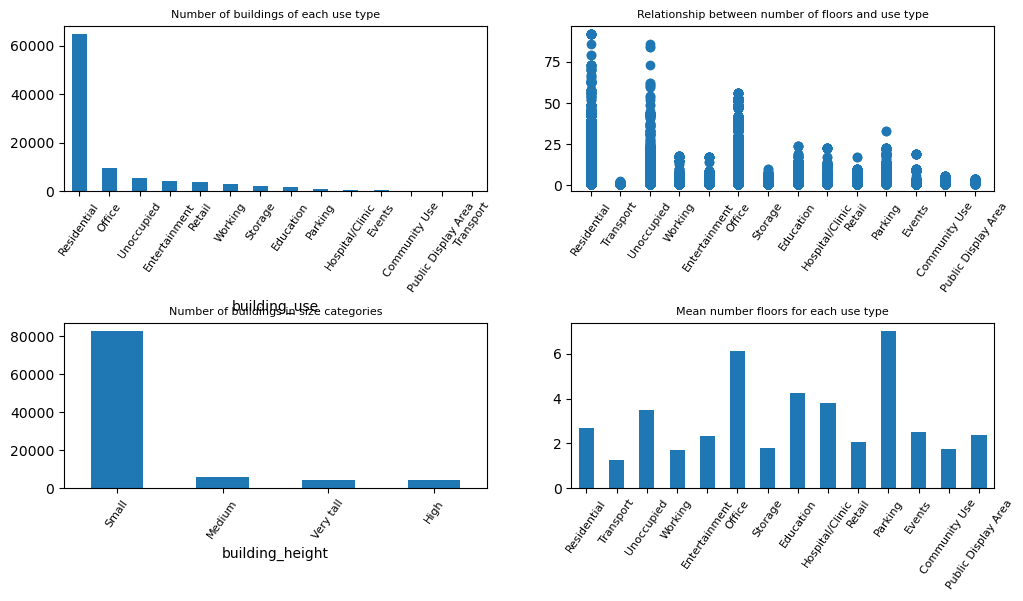

In [6]:
fig,axs = plt.subplots(2,2, figsize = (12,6))
buildings_df['building_use'].value_counts().plot(ax=axs[0,0], kind='bar', fontsize = 10)
axs[0,0].set_title('Number of buildings of each use type', fontsize = 8)
axs[0,0].tick_params(axis='x', labelrotation= 55, labelsize = 8)
axs[0,1].scatter(buildings_df['building_use'], buildings_df['n_floors'])
axs[0,1].tick_params(axis='x', labelrotation= 55, labelsize = 8)
axs[0,1].set_title('Relationship between number of floors and use type', fontsize = 8)
buildings_df['building_height'].value_counts().plot(ax=axs[1,0],kind='bar',xlabel = None)
axs[1,0].set_title('Number of buildings in size categories', fontsize = 8)
nfloors_by_building_use.plot(ax=axs[1,1], kind='bar', legend = False)
axs[1,0].tick_params(axis='x', labelrotation= 55, labelsize = 8)
axs[1,1].set_xticklabels(buildings_df['building_use'].unique())
axs[1,1].set_title('Mean number floors for each use type', fontsize = 8)
axs[1,1].tick_params(axis='x', labelrotation= 55, labelsize = 8)
axs[1,1].set(xlabel=None);

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)

# Checking how much difference there actually is in buildings each year
#### Also, buildings only goes to 2019  - do we assume buildings in subsequent years are the same??

In [9]:
num_features = pd.read_csv("../Cleaned_data/FeaturesNearSensors/num_features_near_sensors_400.csv", index_col = 0)

In [10]:
just_buildings = num_features[4:]
difference_between_years = just_buildings.diff(axis=0)
df = pd.DataFrame({'Sensor_num':num_features.columns,
                  "Max_diff_in_buildings":  abs(difference_between_years).max(axis=0)})

# Furniture
Most common feature type is bollard - surely we can remove this?
Can remove condition rating variable? Values between 1 and 5

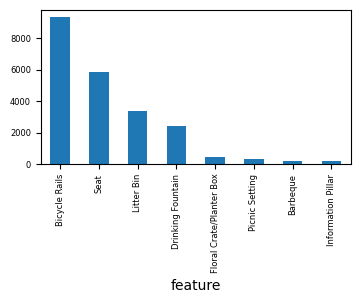

In [11]:
fig,ax = plt.subplots(figsize = (4,2))
furniture_df['feature'].value_counts().plot(kind='bar')
# Remove the features that don't seem relevant 
furniture_df = furniture_df[furniture_df["feature"].isin(['Bollard', 'Tree Guard','Horse Trough', 'Hoop']) == False]
furniture_df['feature'].value_counts().plot(kind='bar',ax=ax, fontsize =6);

# Landmarks

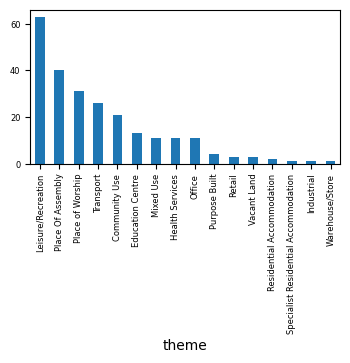

In [12]:
fig,ax = plt.subplots(figsize = (4,2))
landmarks_df['theme'].value_counts().plot(kind='bar',ax=ax, fontsize =6);
# landmarks_df['sub_theme'].value_counts().plot(kind='bar')